In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
train_df=pd.read_csv('../input/30daysofml/data.csv')
test_df=pd.read_csv('../input/30daysofml/test_data.csv')
sample_df=pd.read_csv('../input/30daysofml/sample_subs.csv')

In [2]:
train_df.head()

,Unnamed: 0,id,total_bill,sex,smoker,day,time,size,tip
0,0,1,16.99,Female,No,Sun,Dinner,2,1.01
1,1,2,10.34,Male,No,Sun,Dinner,3,1.66
2,2,3,21.01,Male,No,Sun,Dinner,3,3.50
3,3,4,23.68,Male,No,Sun,Dinner,2,3.31
4,4,5,24.59,Female,No,Sun,Dinner,4,3.61


In [3]:
train_df.shape

(244, 9)

In [4]:
test_df.head()

,id,total_bill,sex,smoker,day,time,size
0,1,16.99,Female,No,Sun,Dinner,2
1,2,10.34,Male,No,Sun,Dinner,3
2,3,21.01,Male,No,Sun,Dinner,3
3,4,23.68,Male,No,Sun,Dinner,2
4,5,24.59,Female,No,Sun,Dinner,4


In [5]:
test_df.shape

(25, 7)

In [6]:
sample_df.head()

,id,tip
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


In [7]:
sample_df.shape

(25, 2)

In [8]:
train_df.isnull().sum()

Unnamed: 0    0
id            0
total_bill    0
sex           0
smoker        0
day           0
time          0
size          0
tip           0
dtype: int64

In [9]:
train_df.describe()

,Unnamed: 0,id,total_bill,size,tip
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,121.500000,122.500000,19.785943,2.569672,2.998279
std,70.580923,70.580923,8.902412,0.951100,1.383638
min,0.000000,1.000000,3.070000,1.000000,1.000000
25%,60.750000,61.750000,13.347500,2.000000,2.000000
50%,121.500000,122.500000,17.795000,2.000000,2.900000
75%,182.250000,183.250000,24.127500,3.000000,3.562500
max,243.000000,244.000000,50.810000,6.000000,10.000000


In [10]:
train_df.tail(1)

,Unnamed: 0,id,total_bill,sex,smoker,day,time,size,tip
243,243,244,18.78,Female,No,Thur,Dinner,2,3.0


In [11]:
train_df=train_df.drop(columns=['Unnamed: 0','id'],axis=1)
train_df.head(1)

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01


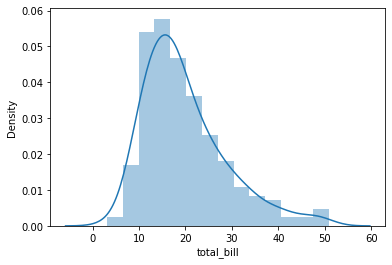

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(train_df['total_bill'])
plt.show()

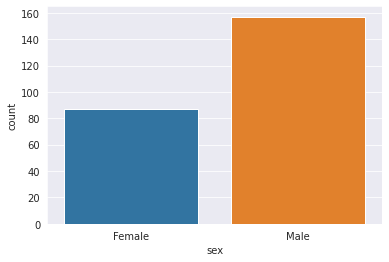

In [13]:
sns.set_style('darkgrid')
sns.countplot(train_df['sex'])
plt.show()

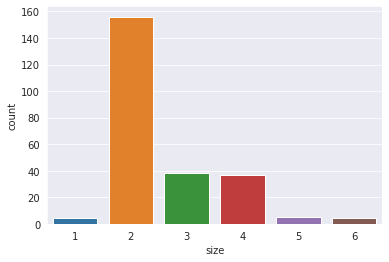

In [14]:
sns.countplot(train_df['size'])
plt.show()

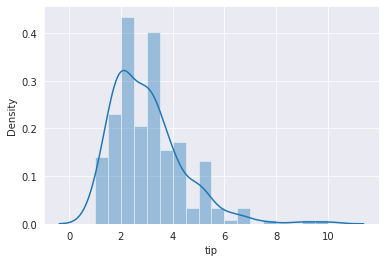

In [15]:
sns.distplot(train_df['tip'])
plt.show()

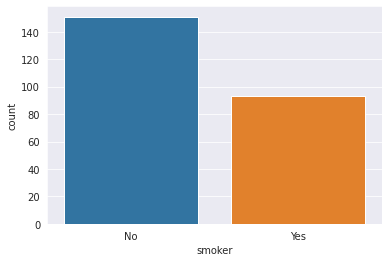

In [16]:
sns.countplot(train_df['smoker'])
plt.show()

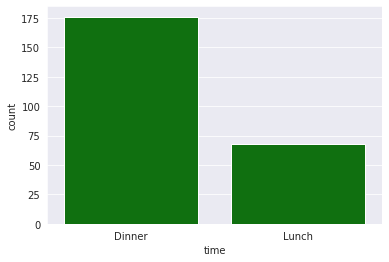

In [17]:
sns.countplot(train_df.time,color='green')
plt.show()

In [18]:
train_df.head(1)

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01


In [19]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(drop='first',sparse=False)
train_cols=['sex','smoker','day','time']
for col in train_cols:
    train_df[col]=oh.fit_transform(train_df[[col]])

In [20]:
train_df.head()

,total_bill,sex,smoker,day,time,size,tip
0,16.99,0.0,0.0,0.0,0.0,2,1.01
1,10.34,1.0,0.0,0.0,0.0,3,1.66
2,21.01,1.0,0.0,0.0,0.0,3,3.50
3,23.68,1.0,0.0,0.0,0.0,2,3.31
4,24.59,0.0,0.0,0.0,0.0,4,3.61


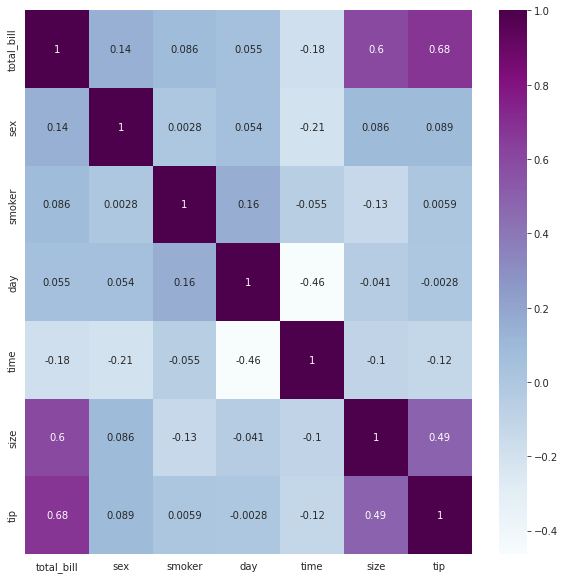

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,cmap='BuPu')
plt.show()

In [22]:
x=train_df.drop(columns='tip',axis=1)
y=train_df['tip']

In [23]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,0.0,0.0,0.0,0.0,2
1,10.34,1.0,0.0,0.0,0.0,3
2,21.01,1.0,0.0,0.0,0.0,3
3,23.68,1.0,0.0,0.0,0.0,2
4,24.59,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...
239,29.03,1.0,0.0,1.0,0.0,3
240,27.18,0.0,1.0,1.0,0.0,2
241,22.67,1.0,1.0,1.0,0.0,2
242,17.82,1.0,0.0,1.0,0.0,2


In [24]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.11)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()

In [27]:
rfg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
n_estimators=[int(x) for x in np.linspace(5,300,6)]
criterion=['mse','mae']
max_features=['auto','sqrt','log2']
max_samples=[0.5,0.75,1.0]

In [29]:
param_grid={
    
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_features':max_features,
    'max_samples':max_samples
    
}

In [30]:
param_grid

{'n_estimators': [5, 64, 123, 182, 241, 300],
 'criterion': ['mse', 'mae'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_samples': [0.5, 0.75, 1.0]}

In [31]:
from sklearn.model_selection import GridSearchCV
rfg_grid=GridSearchCV(estimator=rfg,param_grid=param_grid,cv=2)

In [32]:
rfg_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [5, 64, 123, 182, 241, 300]})

In [33]:
rfg_grid.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'max_samples': 0.5,
 'n_estimators': 123}

In [34]:
rfg_grid.best_score_

0.4098078754540229

In [35]:
best_grid=rfg_grid.best_estimator_
best_grid

RandomForestRegressor(max_samples=0.5, n_estimators=123)

In [36]:
best_grid.fit(x_train,y_train)
y_pred1=best_grid.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred1)

0.5402324975580386

In [37]:
test_df.head(1)

,id,total_bill,sex,smoker,day,time,size
0,1,16.99,Female,No,Sun,Dinner,2


In [38]:
test_df=test_df.drop(columns='id',axis=1)
test_df

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
5,25.29,Male,No,Sun,Dinner,4
6,8.77,Male,No,Sun,Dinner,2
7,26.88,Male,No,Sun,Dinner,4
8,15.04,Male,No,Sun,Dinner,2
9,14.78,Male,No,Sun,Dinner,2


In [39]:
test_df['sex']=test_df['sex'].map({'Female':0,'Male':1})
test_df.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,No,Sun,Dinner,2
1,10.34,1,No,Sun,Dinner,3
2,21.01,1,No,Sun,Dinner,3
3,23.68,1,No,Sun,Dinner,2
4,24.59,0,No,Sun,Dinner,4


In [40]:
test_df['smoker']=test_df['smoker'].map({'No':0})
test_df['day']=test_df['day'].map({'Sun':0,'Sat':1})
test_df['time']=test_df['time'].map({'Dinner':0})

In [41]:
test_df.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,0,0,2
1,10.34,1,0,0,0,3
2,21.01,1,0,0,0,3
3,23.68,1,0,0,0,2
4,24.59,0,0,0,0,4


In [42]:
best_grid.fit(x,y)

RandomForestRegressor(max_samples=0.5, n_estimators=123)

In [43]:
y_pred=best_grid.predict(test_df)

In [44]:
y_pred=y_pred.round(2)
y_pred

array([2.34, 1.74, 3.41, 3.35, 3.35, 4.38, 1.71, 3.65, 2.26, 2.6 , 1.83,
       4.98, 1.98, 2.82, 2.72, 3.73, 1.91, 2.73, 2.84, 3.1 , 3.04, 2.85,
       2.48, 5.76, 3.06])

In [45]:
sub=pd.DataFrame({'id':sample_df['id'],'tip':y_pred})

In [46]:
sub.to_csv('submission.csv',index=None)